# FIT1043 Assignment 2

### Louis Meng Hoe Chow

# 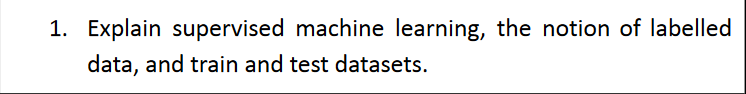

### Supervised machine learning is a branch concept of machine learning that uses both input & output data to produce predictions. Labelled data takes the form of input data that contains a corresponding output called label. This is what makes supervised machine learning unique, as the labels act as target values for your model to predict. This is performed using train & test datasets, where you use train datasets to allow your model to derive trends & patterns that correlates the input data & the labels together, and use test datasets to validate said accuracy of trained model.

# 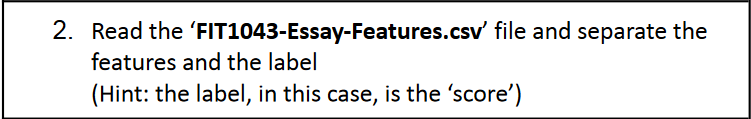

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

dataset = pd.read_csv('FIT1043-Essay-Features.csv')

In [2]:
dataset.head()

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
0,1457,2153,426,14,6,0,5.053991,16,0,26.625000,423.995272,0.995294,207,0.485915,105,0.246479,424,412,4
1,503,1480,292,9,7,0,5.068493,11,0,26.545455,290.993103,0.996552,148,0.506849,77,0.263699,356,345,4
2,253,3964,849,19,26,1,4.669022,49,2,17.326531,843.990544,0.994100,285,0.335689,130,0.153121,750,750,4
3,107,988,210,8,7,0,4.704762,12,0,17.500000,207.653784,0.988828,112,0.533333,62,0.295238,217,209,3
4,1450,3139,600,13,8,0,5.231667,24,1,25.000000,594.652150,0.991087,255,0.425000,165,0.275000,702,677,4


In [3]:
features = dataset.iloc[:,0:18].values
label = dataset.iloc[:,18].values

In [4]:
features[0]

array([1.45700000e+03, 2.15300000e+03, 4.26000000e+02, 1.40000000e+01,
       6.00000000e+00, 0.00000000e+00, 5.05399061e+00, 1.60000000e+01,
       0.00000000e+00, 2.66250000e+01, 4.23995272e+02, 9.95294065e-01,
       2.07000000e+02, 4.85915493e-01, 1.05000000e+02, 2.46478873e-01,
       4.24000000e+02, 4.12000000e+02])

# 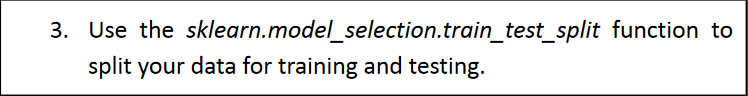

In [5]:
from sklearn.model_selection import train_test_split
features_train, features_test, label_train, label_test = train_test_split(
    features, label, test_size = 0.25, random_state = 0
)

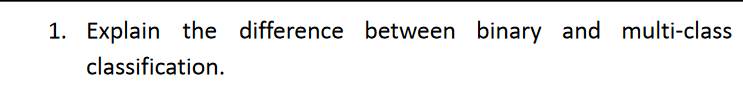

### Binary & Multi-class classification, although similar in concept differs primarily in the output that both classifications produces. Binary classification only contains two possible outcomes/outputs, denoted usually as outputs like 0 and 1, true and false. Multi-class classification differs with this, as there are more than 2 possible outcomes/outputs in such a classification, which means an output can vary alot more than 2 values. This is reflected in the confusion matrix as binary classification comes in a 2x2 matrix to denote true positive/negative & false positive/negative outputs, while multi-class classification's matrix scales according to the number of outputs the dataset can generate.

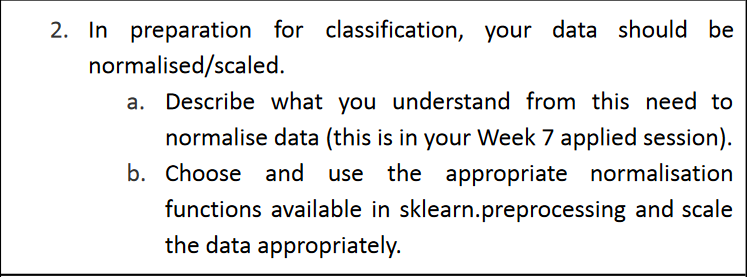

## a.
### Data is recommended to be normalized when the range of values between your features varies greatly, as numerous functions assume the features are scaled proportionally to each other, so if one of those features has a larger range of values than the other, the function will skew very heavily towards the feature with the larger range of values. Normalizing your features scales all your values relative to each other, so that such a problem can be solved. Normalization also benefits alot when visualizing data in a graph, as it is easier to visualize data that are closer to each other.

## b.

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features_train = sc.fit_transform(features_train)
features_test = sc.transform(features_test)

In [7]:
features_train[0]

array([ 0.94694371,  0.28684034,  0.38716127, -0.52496032,  0.44571172,
       -0.41870753, -0.70522038, -0.23728237, -0.65162306,  0.40195483,
        0.39407748,  0.52980282,  0.07996837, -1.03601228,  0.38954264,
       -0.12344141,  0.24983146,  0.26442177])

In [8]:
features_test[0]

array([ 0.33003276, -0.24725206, -0.28847132,  0.55356998, -0.85957522,
       -0.41870753,  0.46083592,  0.315528  , -0.65162306, -0.59331856,
       -0.28880026,  0.03598027, -0.06332921,  0.96457761, -0.34445669,
       -0.27501425, -0.38492267, -0.40425116])

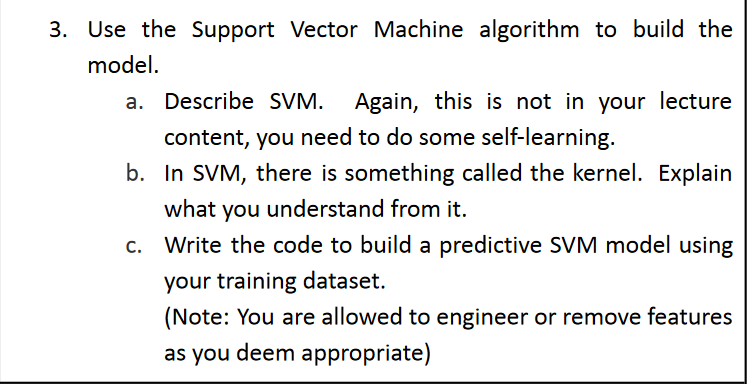

## a.
### The Support Vector Machine algorithm is one of the numerous algorithm that is primarily used for classification & regression. The main objective of the SVM is to find a hyperplane in a dimensional space that scales according to the number of features it takes. This hyperplane optimally allows the maximization of the margin between the classes within the data, which benefits alot when classifying new data  

## b.
### The kernel is a way to classify datasets by finding the similarity between the points. This is done by taking numerous sets of points and computing the similarity of their outputs using a certain function, like the Polynomial Kernel, Gaussian Kernel, etc. This is computationaly less strenuous than purely classifying with the largest margin, and is the preffered method to classify when the dataset is not linearly classifiable.

## c.

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define a range of C values to search through
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

svm_classifier = SVC(kernel = 'linear', random_state = 0, class_weight = {1: 1.0, 2: 1.0, 3: 2.0, 4: 2.0, 5: 1.0})
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(features_train, label_train)
best_C = grid_search.best_params_['C']

svm_classifier = SVC(kernel = 'linear', random_state = 0, class_weight = {1:1.0, 2: 1.0, 3: 2.0, 4: 2.0, 5: 1.0}, C=best_C)
svm_classifier.fit(features_train, label_train)

C:\Users\louis\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


SVC(C=0.1, class_weight={1: 1.0, 2: 1.0, 3: 2.0, 4: 2.0, 5: 1.0},
    kernel='linear', random_state=0)

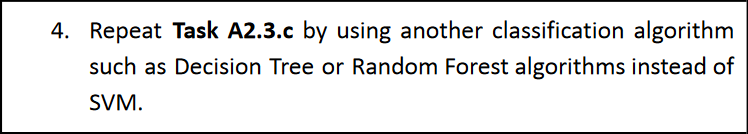

In [10]:
from sklearn.tree import DecisionTreeClassifier
dtc_classifier = DecisionTreeClassifier(
    criterion = 'entropy', random_state = 0
)
dtc_classifier.fit(features_train, label_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

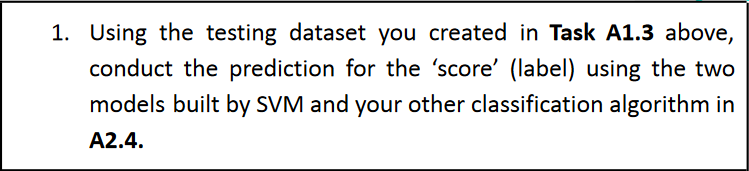

In [11]:
label_pred_svm = svm_classifier.predict(features_test)
label_pred_dtc = dtc_classifier.predict(features_test)

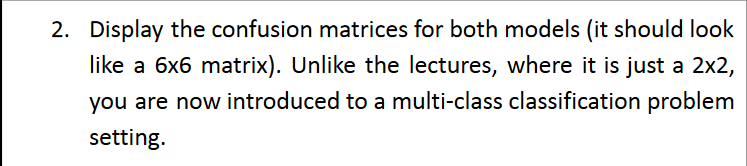

In [12]:
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(label_test,label_pred_svm)
cm_dtc = confusion_matrix(label_test,label_pred_dtc)

In [13]:
np.unique(label_pred_dtc)

array([1, 2, 3, 4, 5], dtype=int64)

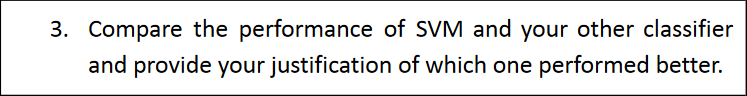

In [14]:
cm_svm

array([[  0,   2,   0,   0,   0,   0],
       [  0,   8,  14,   1,   0,   0],
       [  0,   1, 112,  34,   0,   0],
       [  0,   0,  40, 104,   0,   0],
       [  0,   0,   1,  15,   0,   0],
       [  0,   0,   0,   1,   0,   0]], dtype=int64)

In [15]:
cm_dtc

array([[ 0,  2,  0,  0,  0,  0],
       [ 0,  7, 14,  2,  0,  0],
       [ 1, 11, 90, 42,  3,  0],
       [ 0,  3, 46, 89,  6,  0],
       [ 0,  0,  2, 12,  2,  0],
       [ 0,  0,  0,  1,  0,  0]], dtype=int64)

In [16]:
accuracy_svm = (cm_svm[0,0]+cm_svm[1,1]+cm_svm[2,2]+cm_svm[3,3]+cm_svm[4,4]+cm_svm[5,5])/len(label_test)
accuracy_dtc = (cm_dtc[0,0]+cm_dtc[1,1]+cm_dtc[2,2]+cm_dtc[3,3]+cm_dtc[4,4]+cm_dtc[5,5])/len(label_test)

In [17]:
accuracy_svm

0.6726726726726727

In [18]:
accuracy_dtc

0.5645645645645646

## After computing both confusion matrixes, we can deduce that the SVM managed to perform better than my other classification method DTC. This is because the accuracy using SVM is alot higher than using DTC, as having higher accuracy mean that the amount of output  predicted accurate to the test output is higher. The most popular output 3 & 4 is also frequently predicted more correctly using SVM, which generally indicates the SVM is a better model than DTC for this context.

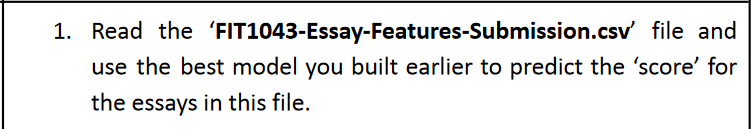

In [19]:
dataset2 = pd.read_csv('FIT1043-Essay-Features-Submission.csv')
features2 = dataset2.iloc[:,0:18].values
features2_test = sc.transform(features2)
label2_pred_svm = svm_classifier.predict(features2_test)

In [20]:
label2_pred_svm

array([4, 3, 4, 4, 4, 4, 3, 3, 3, 3, 3, 4, 4, 3, 3, 4, 4, 4, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 3, 3, 4, 3, 4, 4, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 4, 4, 3, 3, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 3, 3, 4, 3, 3,
       4, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4,
       2, 3, 3, 3, 4, 3, 4, 3, 4, 4, 3, 3, 3, 4, 3, 4, 3, 4, 3, 3, 4, 4,
       4, 3, 4, 4, 4, 3, 3, 4, 2, 3, 4, 4, 4, 3, 3, 4, 3, 4, 4, 3, 4, 4,
       3, 3, 4, 4, 3, 4, 2, 4, 4, 4, 4, 3, 3, 4, 4, 3, 4, 4, 4, 3, 4, 3,
       4, 3, 3, 3, 3, 4, 4, 3, 3, 3, 4, 4, 3, 3, 2, 4, 3, 4, 4, 3, 4, 3,
       4, 3, 3, 4, 4, 3, 4, 4, 4, 4, 3, 3, 3, 3, 3, 4, 3, 4, 3, 4, 4, 3,
       4], dtype=int64)

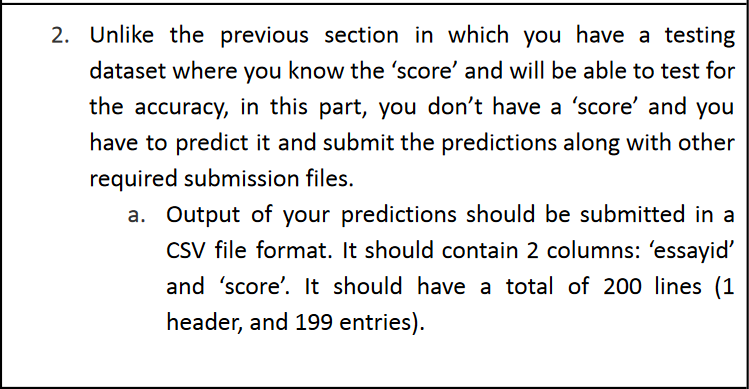

In [21]:
output = {'essayid' : dataset2["essayid"], 'score' : label2_pred_svm}
output_df = pd.DataFrame(output)
output_file = 'predictions.csv'
output_df.to_csv(output_file,index=False)

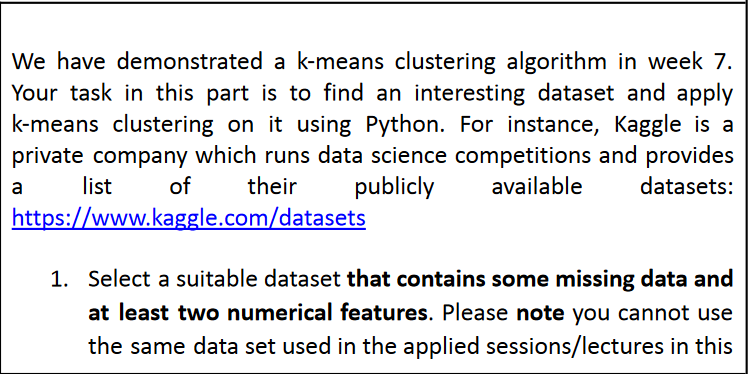

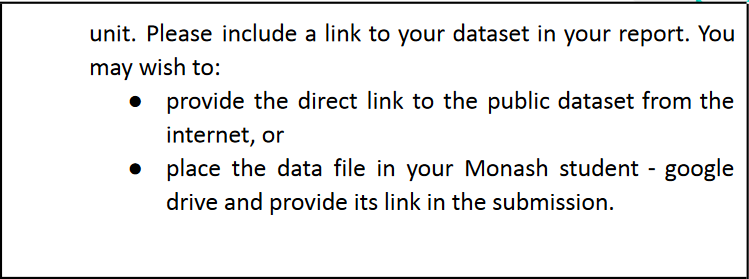

### DATA FILE LINK: https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results

In [22]:
dataset3 = pd.read_csv('athlete_events.csv')
dataset3

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


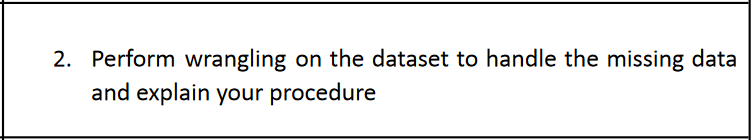

In [23]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [24]:
# The null count is checked across the dataset to find the missing values
dataset3.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [25]:
# The dataset is shortened to more specific features that I wanted to compare
dataset3 = dataset3[['ID','Age','Height','Weight','Year','Medal']]

In [26]:
# To deal with the missing values in Medal, I decided to only include entries that contains atheletes that were winners.
dataset3['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [27]:
gold_dataset3 = dataset3[(dataset3['Medal'] == 'Gold')]

In [28]:
gold_dataset3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13372 entries, 3 to 271076
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      13372 non-null  int64  
 1   Age     13224 non-null  float64
 2   Height  10539 non-null  float64
 3   Weight  10254 non-null  float64
 4   Year    13372 non-null  int64  
 5   Medal   13372 non-null  object 
dtypes: float64(3), int64(2), object(1)
memory usage: 731.3+ KB


In [29]:
gold_dataset3.isnull().sum()

ID           0
Age        148
Height    2833
Weight    3118
Year         0
Medal        0
dtype: int64

In [30]:
# As there are more than sufficient amount of data to deduce a trend without losing too much information, any remaining missing data is removed. 
gold_dataset3 = gold_dataset3.dropna(subset=['Height','Weight','Age'])

In [31]:
gold_dataset3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10167 entries, 42 to 271076
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      10167 non-null  int64  
 1   Age     10167 non-null  float64
 2   Height  10167 non-null  float64
 3   Weight  10167 non-null  float64
 4   Year    10167 non-null  int64  
 5   Medal   10167 non-null  object 
dtypes: float64(3), int64(2), object(1)
memory usage: 556.0+ KB


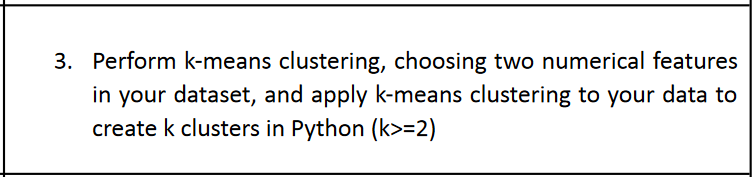

In [32]:
gold_dataset3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10167 entries, 42 to 271076
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      10167 non-null  int64  
 1   Age     10167 non-null  float64
 2   Height  10167 non-null  float64
 3   Weight  10167 non-null  float64
 4   Year    10167 non-null  int64  
 5   Medal   10167 non-null  object 
dtypes: float64(3), int64(2), object(1)
memory usage: 556.0+ KB


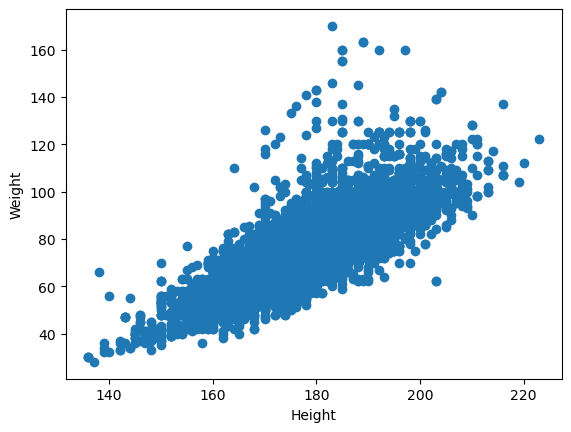

In [33]:
plt.scatter(x=gold_dataset3['Height'],y=gold_dataset3["Weight"])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(
    gold_dataset3[['Height','Weight']]
)

C:\Users\louis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


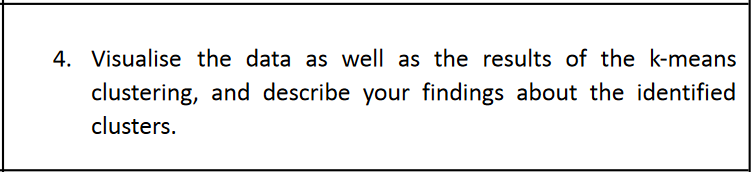

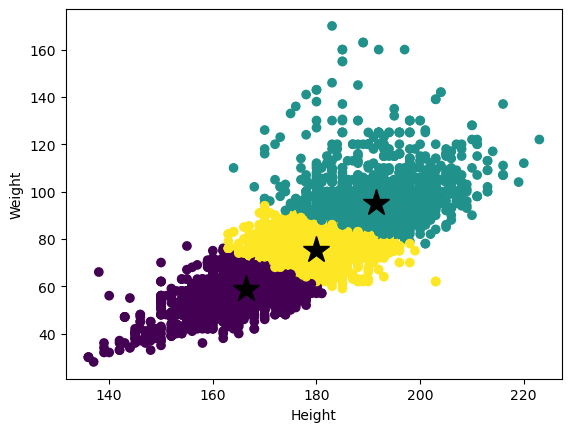

In [35]:
plt.scatter(
    x=gold_dataset3['Height'],
    y=gold_dataset3['Weight'],
    c=kmeans.labels_
)

plt.plot(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    'k*',
    markersize=20
)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

### Through computating the result using k-means clustering, I decided to seperate the clusters into 3 classes to seperate the winners who were both short & light, average-height & weight & tall & heavy. As visualized this is classified into 3 groups: Purple for the winners who were short & light, Yellow for the winners who were average in both weight & height, and Green for the winners who were both tall & heavy. It is interesting to note that as the weight & height plot increases the value grows more sporadically, indicating there were a greater influx in data for the Green class range. This also shows a proportional relationship between height & weight.

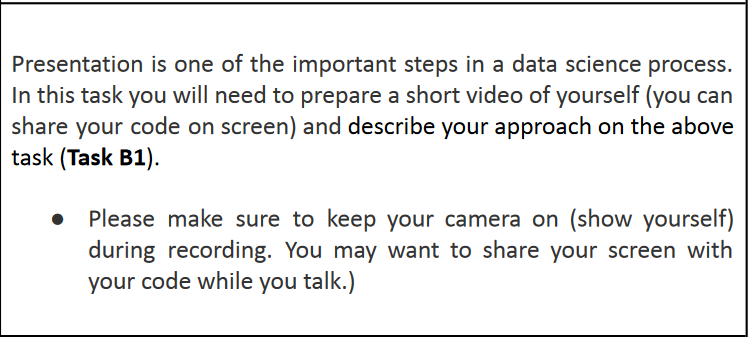